In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
csv_path = os.getenv("~", "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/Pokemon/Pokemon.csv")
original_data = pd.read_csv(csv_path)

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Legendary==True > legendary / Legendary==False > ordinary
#전설의 포켓몬 / 68 / 800
legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
#일반포켓몬 / 735 / 800
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#결측치 확인   #타입2에 결측치가 없다   #두번쨰 속성이 없다
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
#전체 컬럼 확인해보기
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
len(set(pokemon["#"]))

721

In [9]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [10]:
# 각 포켓몬이 가지는 ID값이 겹치는 경우가 있음을 확인 / 고유데이터로 볼 수 있는지 의문

In [11]:
len(set(pokemon["Name"]))

800

In [12]:
# 포켓몬의 이름은 고유데이터로 볼 수 있음 / 800개의 데이터 중 800개네?

In [13]:
pokemon.loc[[6, 10,22,135,287,453,612]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
135,126,Magmar,Fire,NaN,495,65,95,57,100,85,93,1,False
287,264,Linoone,Normal,NaN,420,78,70,61,50,61,100,3,False
453,408,Cranidos,Rock,NaN,350,67,125,40,30,30,58,4,False
612,552,Krokorok,Ground,Dark,351,60,82,45,45,45,74,5,False


In [14]:
#막 찍어도 전설이 안뜨는구만.... 타입2 결측치 확인

In [15]:
#속성 종류 확인 타입1 / 타입2
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [16]:
#set으로 집합을 만들어 차집합 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [17]:
#타입2가 1개 더 많은 이유는 결측치 때문임, 결측치 빼고 타입1과 타입2의 속성은 같음

In [18]:
#포켓몬의 타입을 변수에 저장 타입1의 속성이 모든 속성임 #18개
types = list(set(pokemon['Type 1']))
print(types)

['Poison', 'Rock', 'Psychic', 'Dark', 'Bug', 'Ground', 'Steel', 'Grass', 'Flying', 'Water', 'Fire', 'Fairy', 'Ice', 'Dragon', 'Ghost', 'Fighting', 'Normal', 'Electric']


In [19]:
#타입을 1개만 가지고 있다 -> 타입2가 NaN이다 / 데이터가 비어있는 NaN값의 개수를 확인하고 싶을 때는 isna() 함수사용
pokemon['Type 2'].isna().sum()

386

In [20]:
#386개의 포켓몬이 하나의 속성을 가지고 있음 / 414개의 포켓몬은 2개의 속성

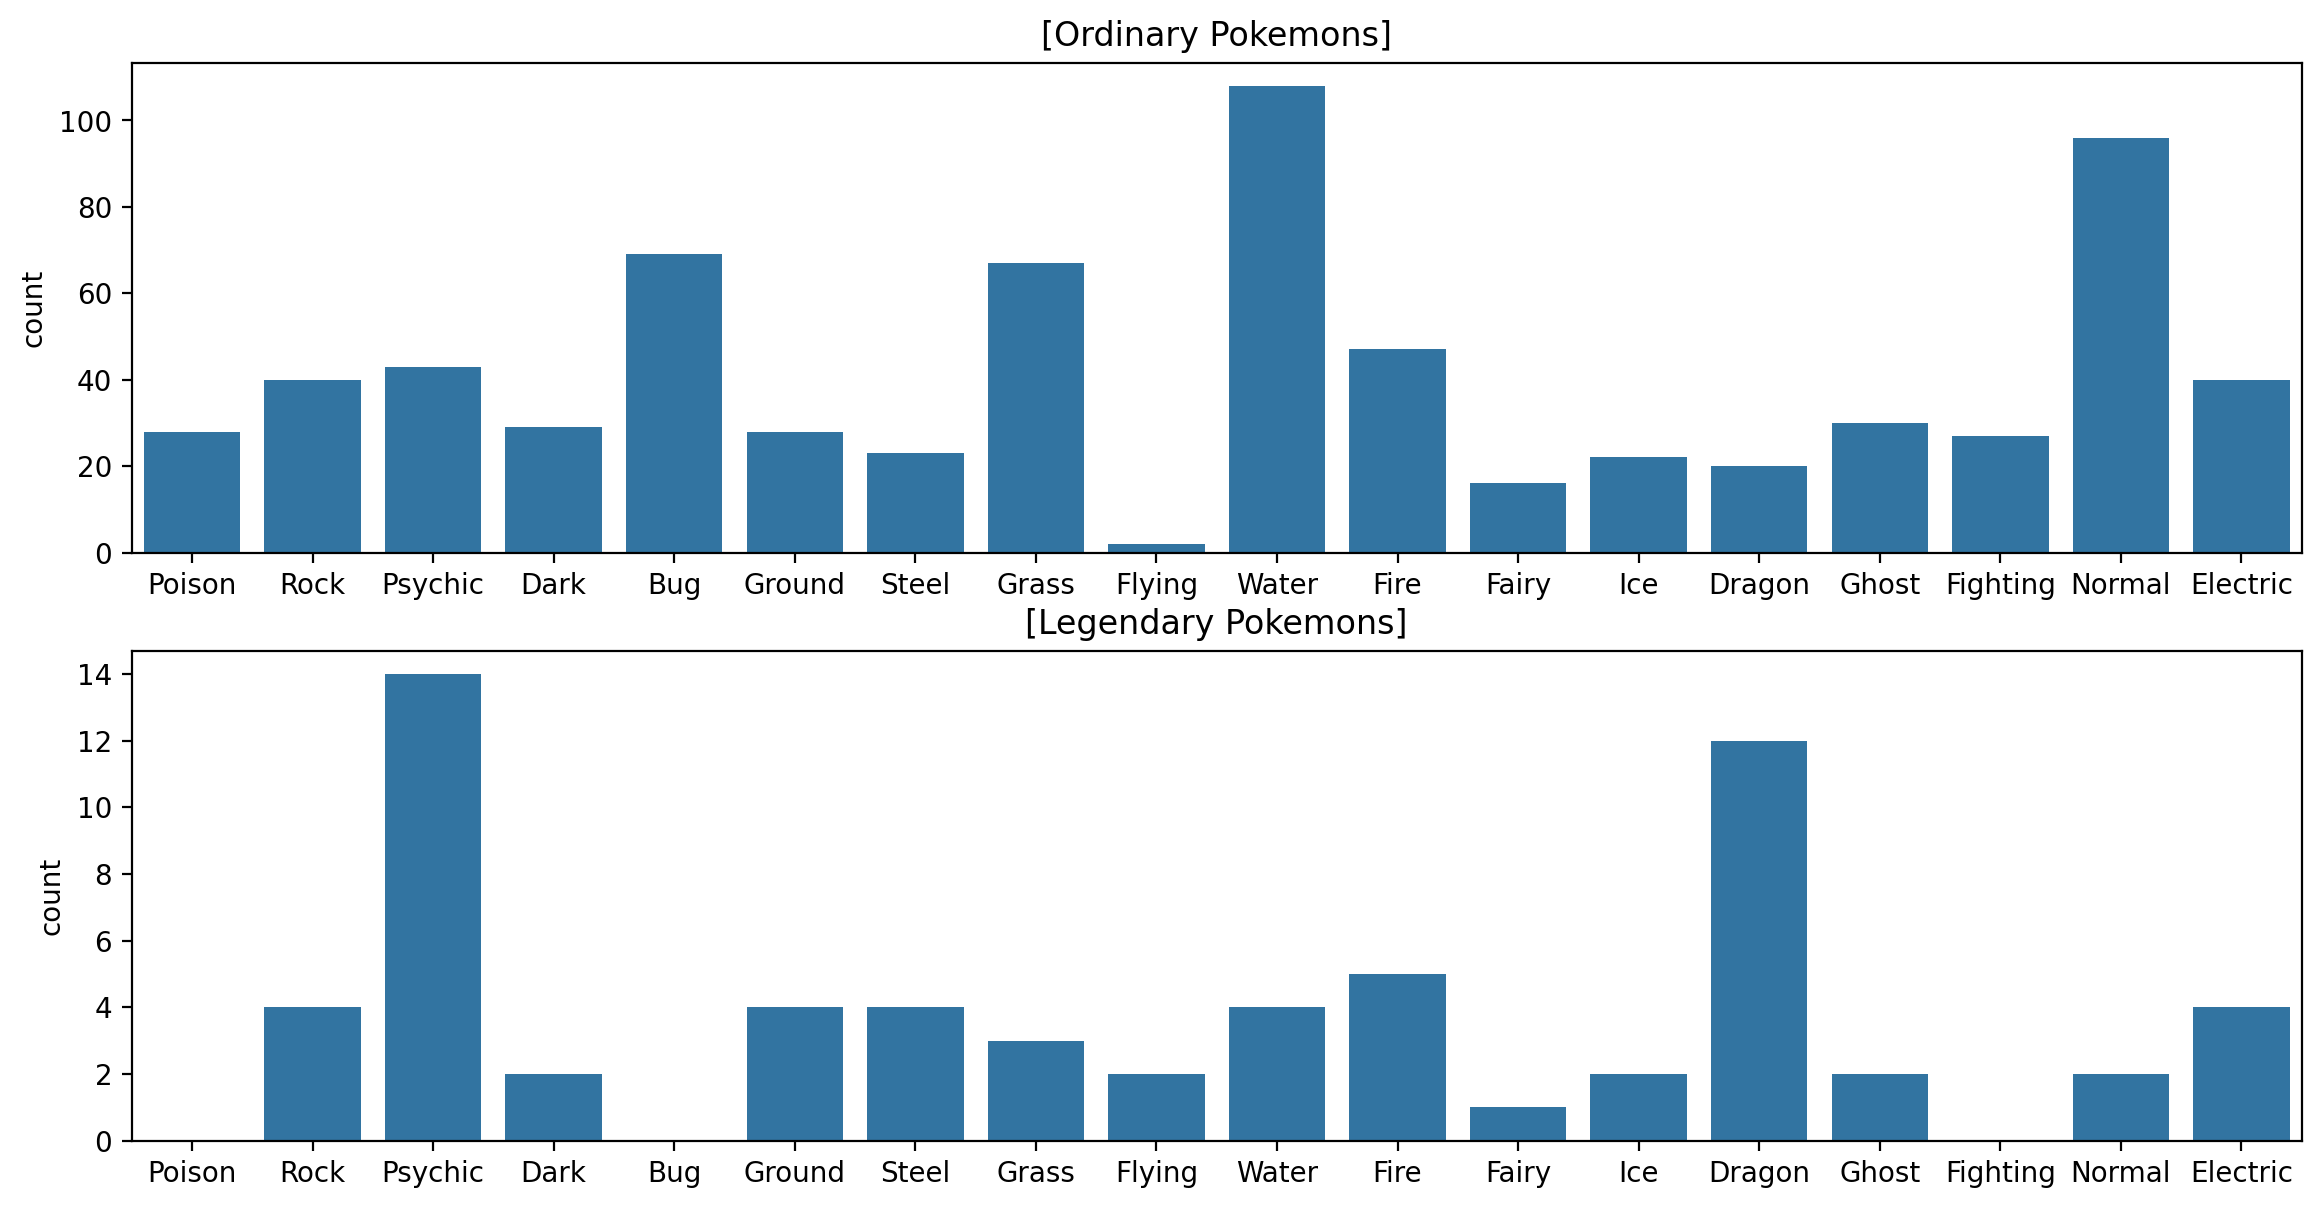

In [21]:
#데이터 분포 plot
#일반 포켓몬과 전설 포켓몬의 속성 분포를 시각화 하여 확인
plt.figure(figsize = (14, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x = 'Type 1', order=types).set_xlabel('')
plt.title('[Ordinary Pokemons]')

plt.subplot(212)
sns.countplot(data=legendary, x = 'Type 1', order=types).set_xlabel('')
plt.title('[Legendary Pokemons]')

plt.show()

In [22]:
# 일반 포켓몬 중 노말, 물, 벌레의 수가 높은 것으로 보임 / 전설 포켓몬 중 정신 / 용의 수가 많은 것으로 보임

In [23]:
# type1 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index='Type 1', values='Legendary').sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [24]:
# 타입별로 전설포켓몬들의 비율을 나타냄 / 플라잉 타입중 절반이 전설

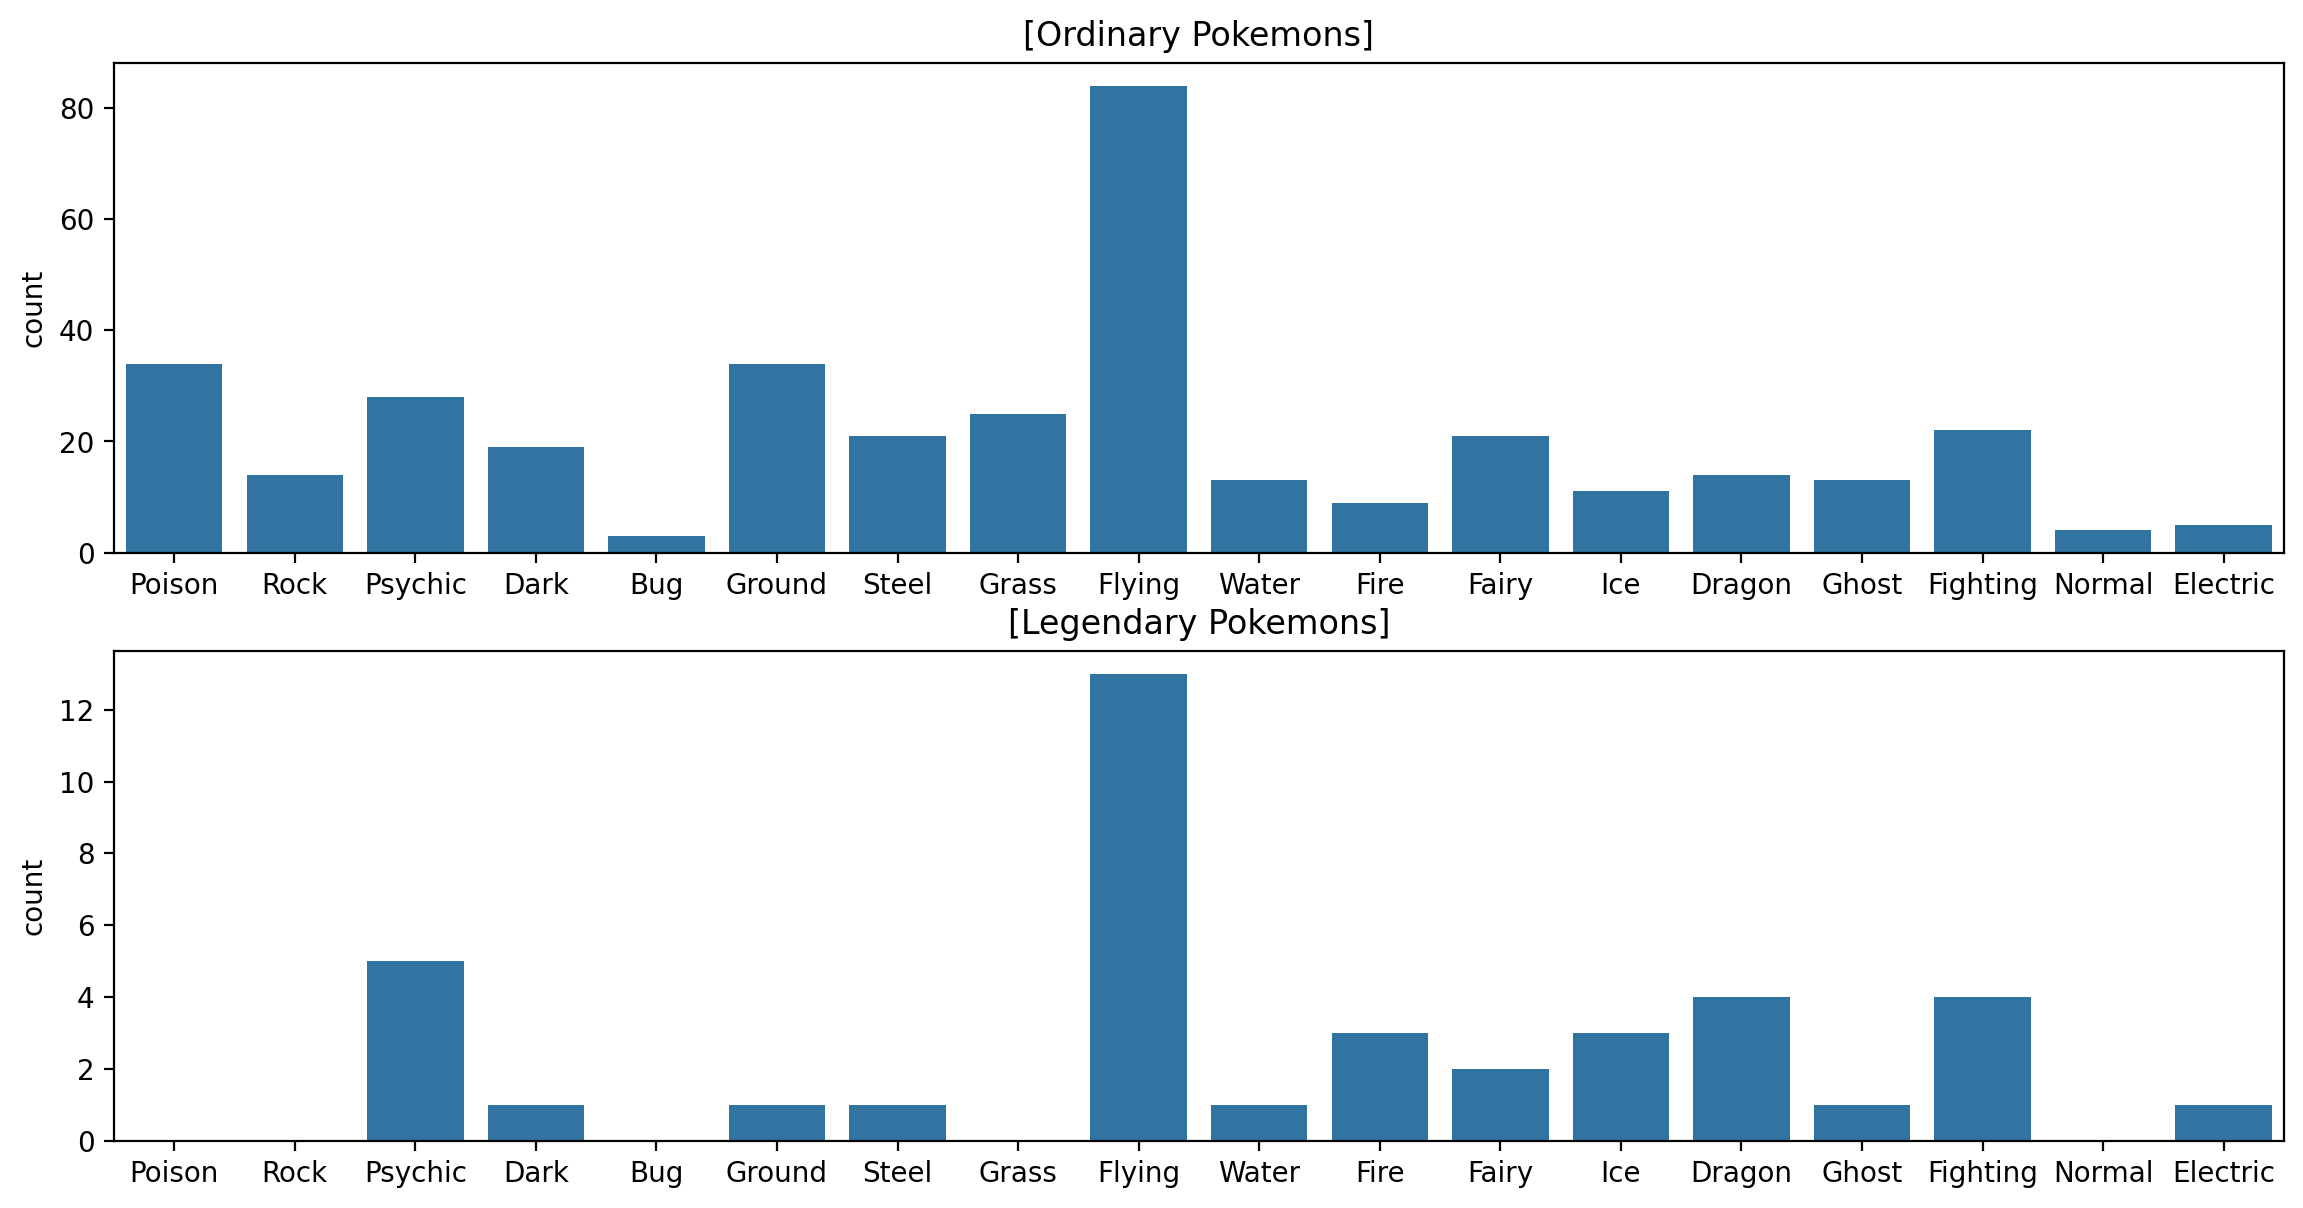

In [25]:
#데이터 분포 plot
#일반 포켓몬과 전설 포켓몬의 속성 분포를 시각화 하여 확인
plt.figure(figsize = (14, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x = 'Type 2', order=types).set_xlabel('')
plt.title('[Ordinary Pokemons]')

plt.subplot(212)
sns.countplot(data=legendary, x = 'Type 2', order=types).set_xlabel('')
plt.title('[Legendary Pokemons]')

plt.show()

In [26]:
# 결측치(NaN)은 빠지고 Type 2에 대한 포켓몬 숫자 / 둘다 플라잉은 많은걸로 보이고 / 전설에는 독 풀 노말 바위 벌레가 없음

In [27]:
# type2 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index='Type 2', values='Legendary').sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [28]:
#포켓몬은 총 6개의 스탯 값을 가진다 (체력포인트(HP), 공격력, 방어력, 스킬공격력(스공), 스킬방어력(스방), 속도(공속))
#스텟을 변수선언
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [29]:
# 6개 스텟 총합과 Total값이 맞는지 검증
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [30]:
#포켓몬 처음 이름
#포켓몬 처음 토탈
#포켓몬 처음 스탯 리스트
#포켓몬 처음 스탯 리스트 합

In [31]:
count = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).sum()
count

800

In [32]:
# Total 값에 따른 분포 plot

In [33]:
# Total과 legendary는 어떤 관계가 있을까

<function matplotlib.pyplot.show(close=None, block=None)>

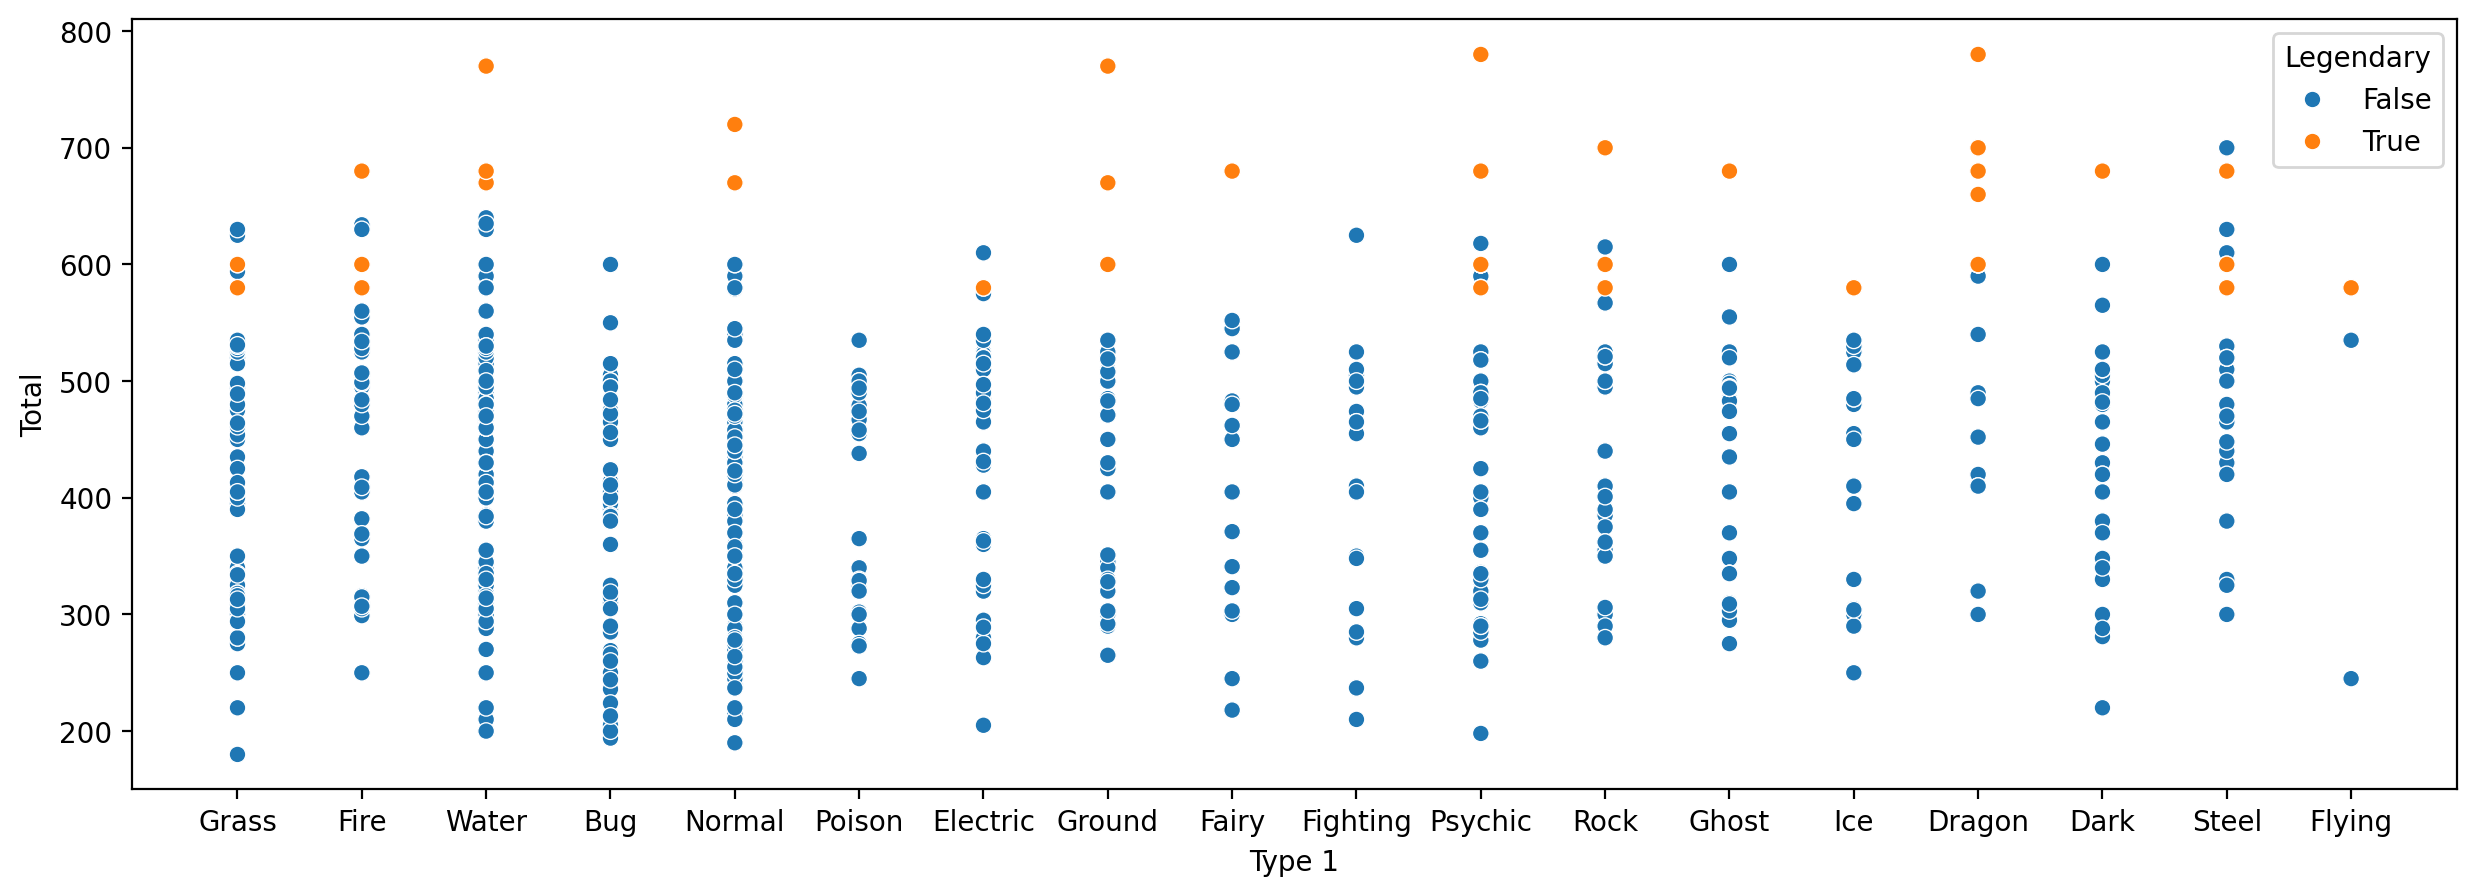

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

sns.scatterplot(data = pokemon, x='Type 1', y='Total', hue='Legendary')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

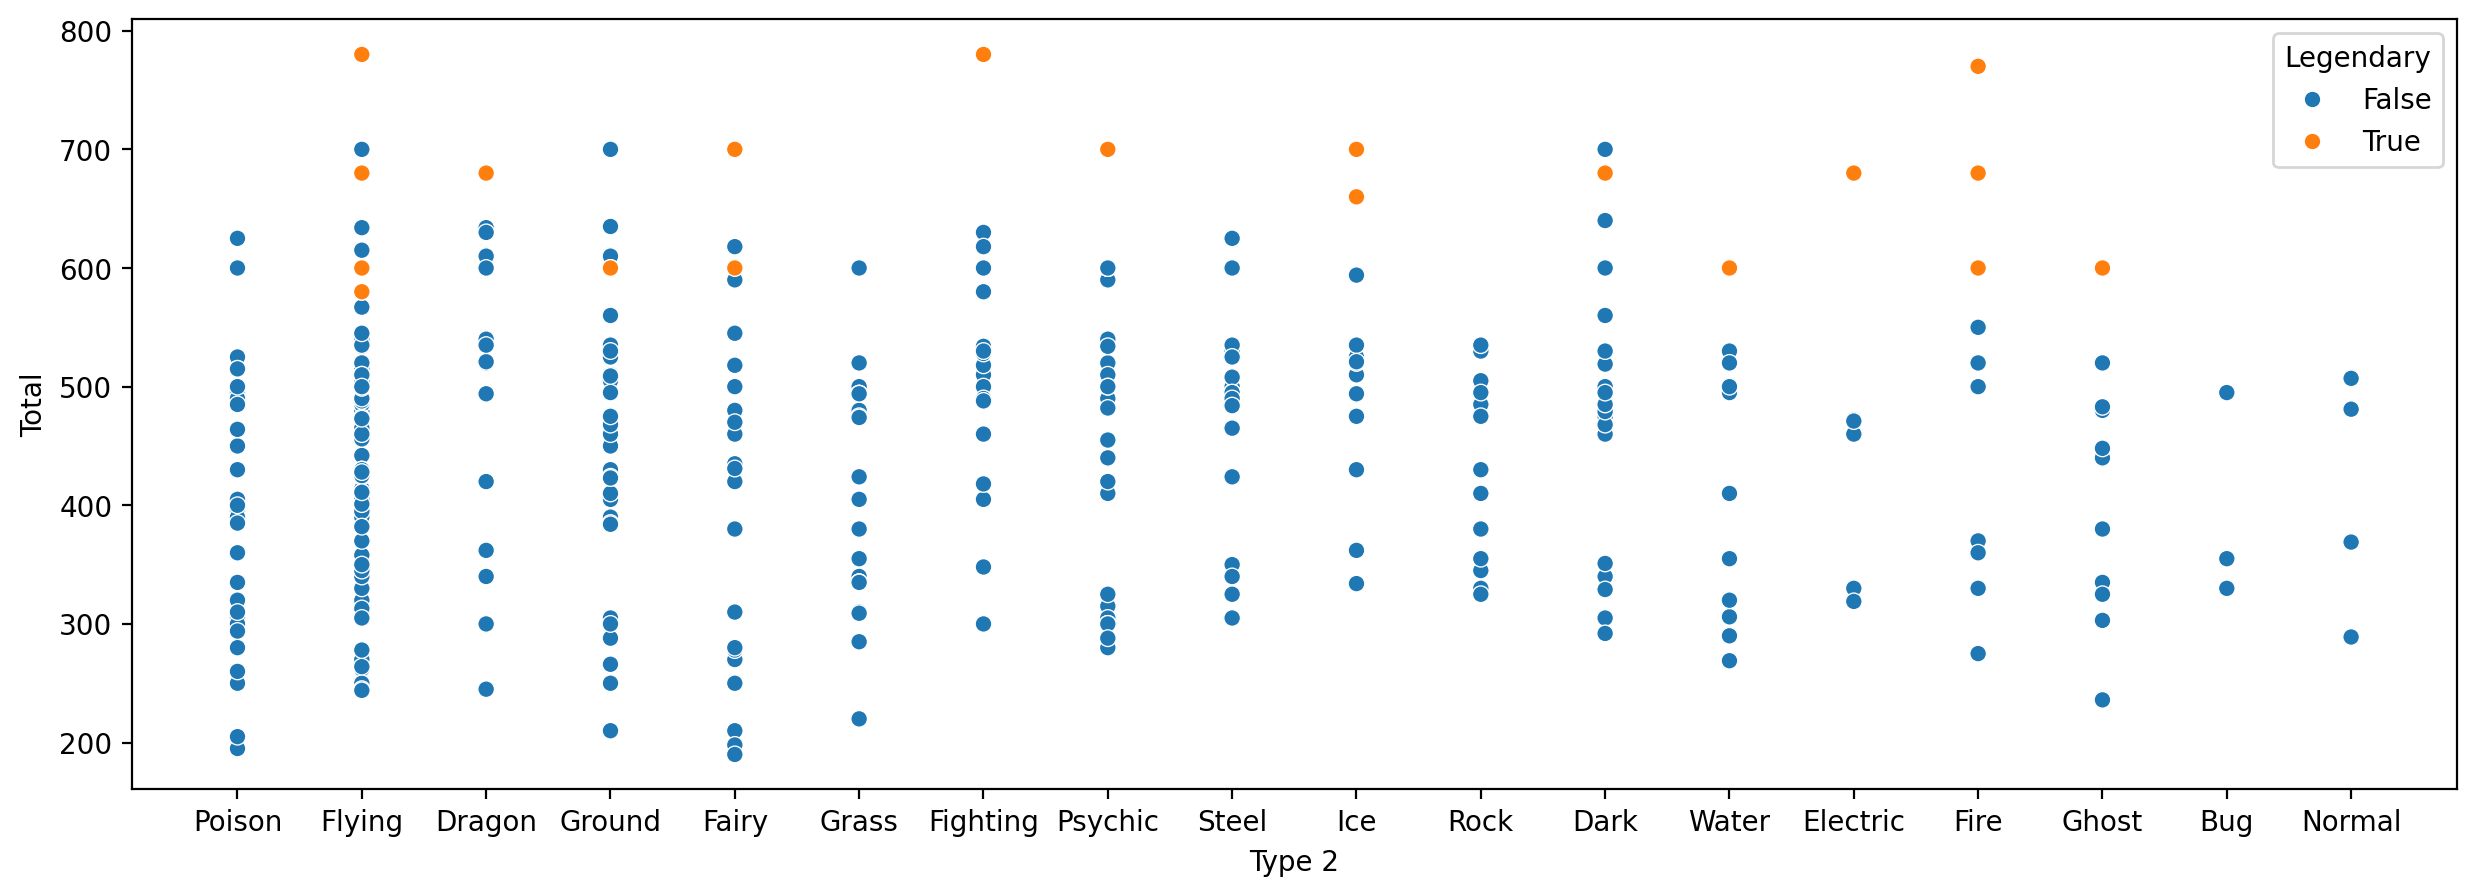

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

sns.scatterplot(data = pokemon, x='Type 2', y='Total', hue='Legendary')
plt.show

In [36]:
#전설은 Total이 높긴 높네

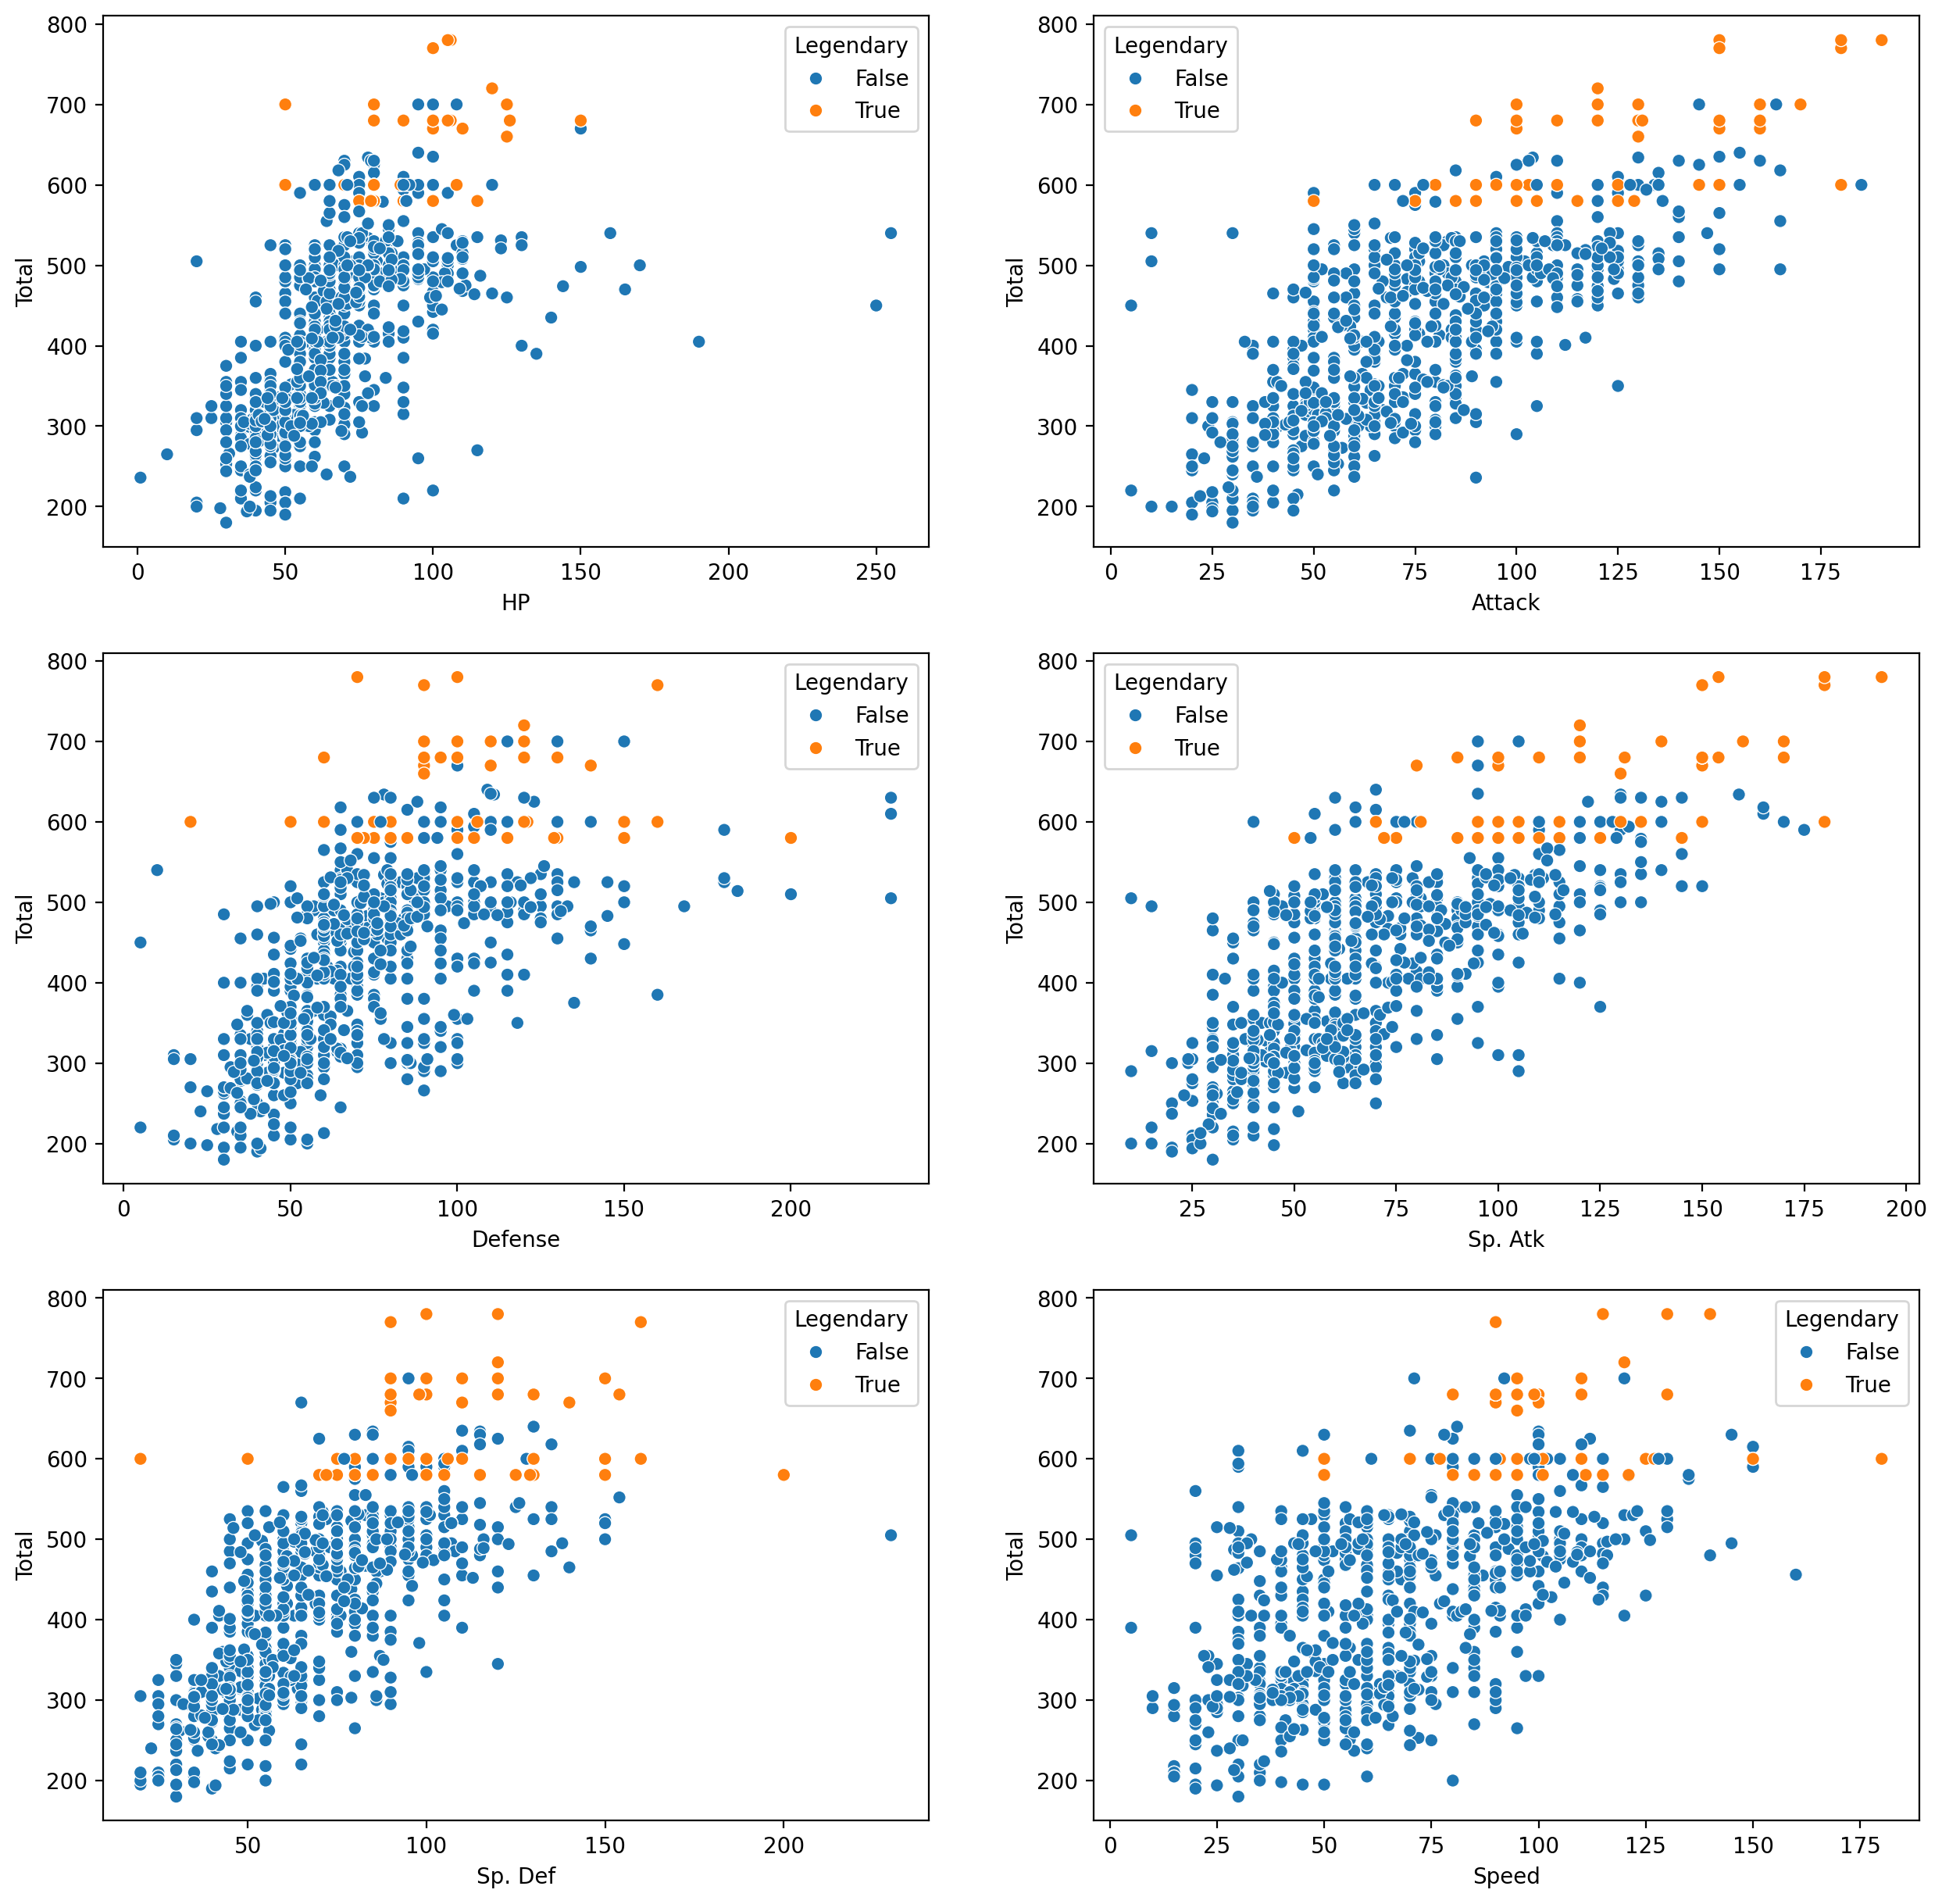

In [37]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 15)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

In [38]:
# 전설이 토탈이 높으면서 각 수치도 높다고 할 수 있는거는 스피드 스공 공격력 정도

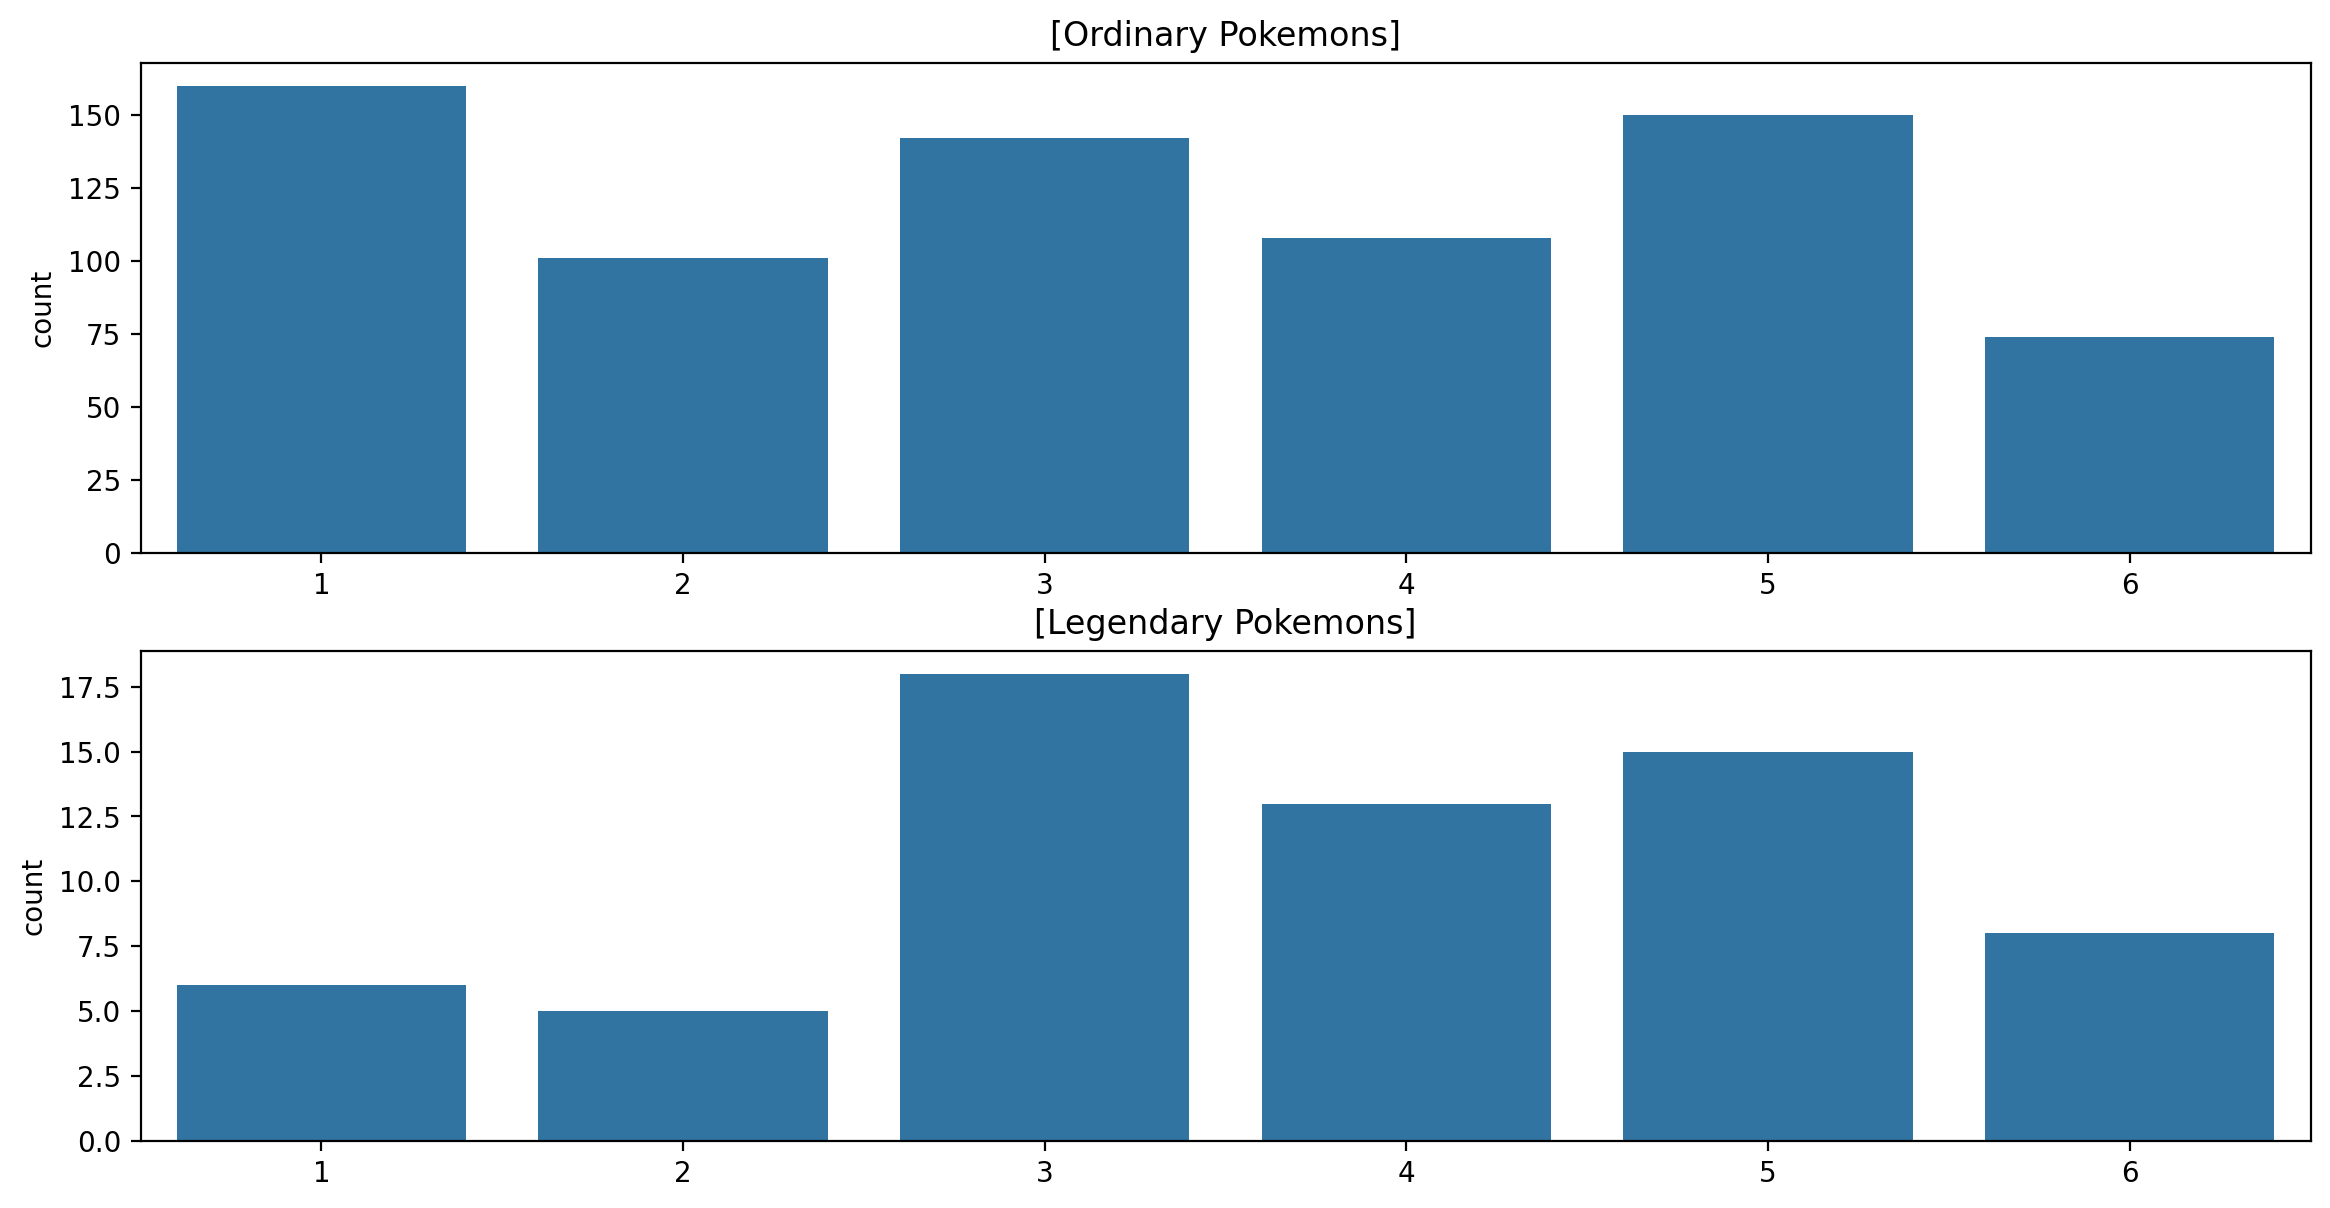

In [39]:
plt.figure(figsize=(14, 7)) 
plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [40]:
#각 세대별로 포켓몬의 숫자

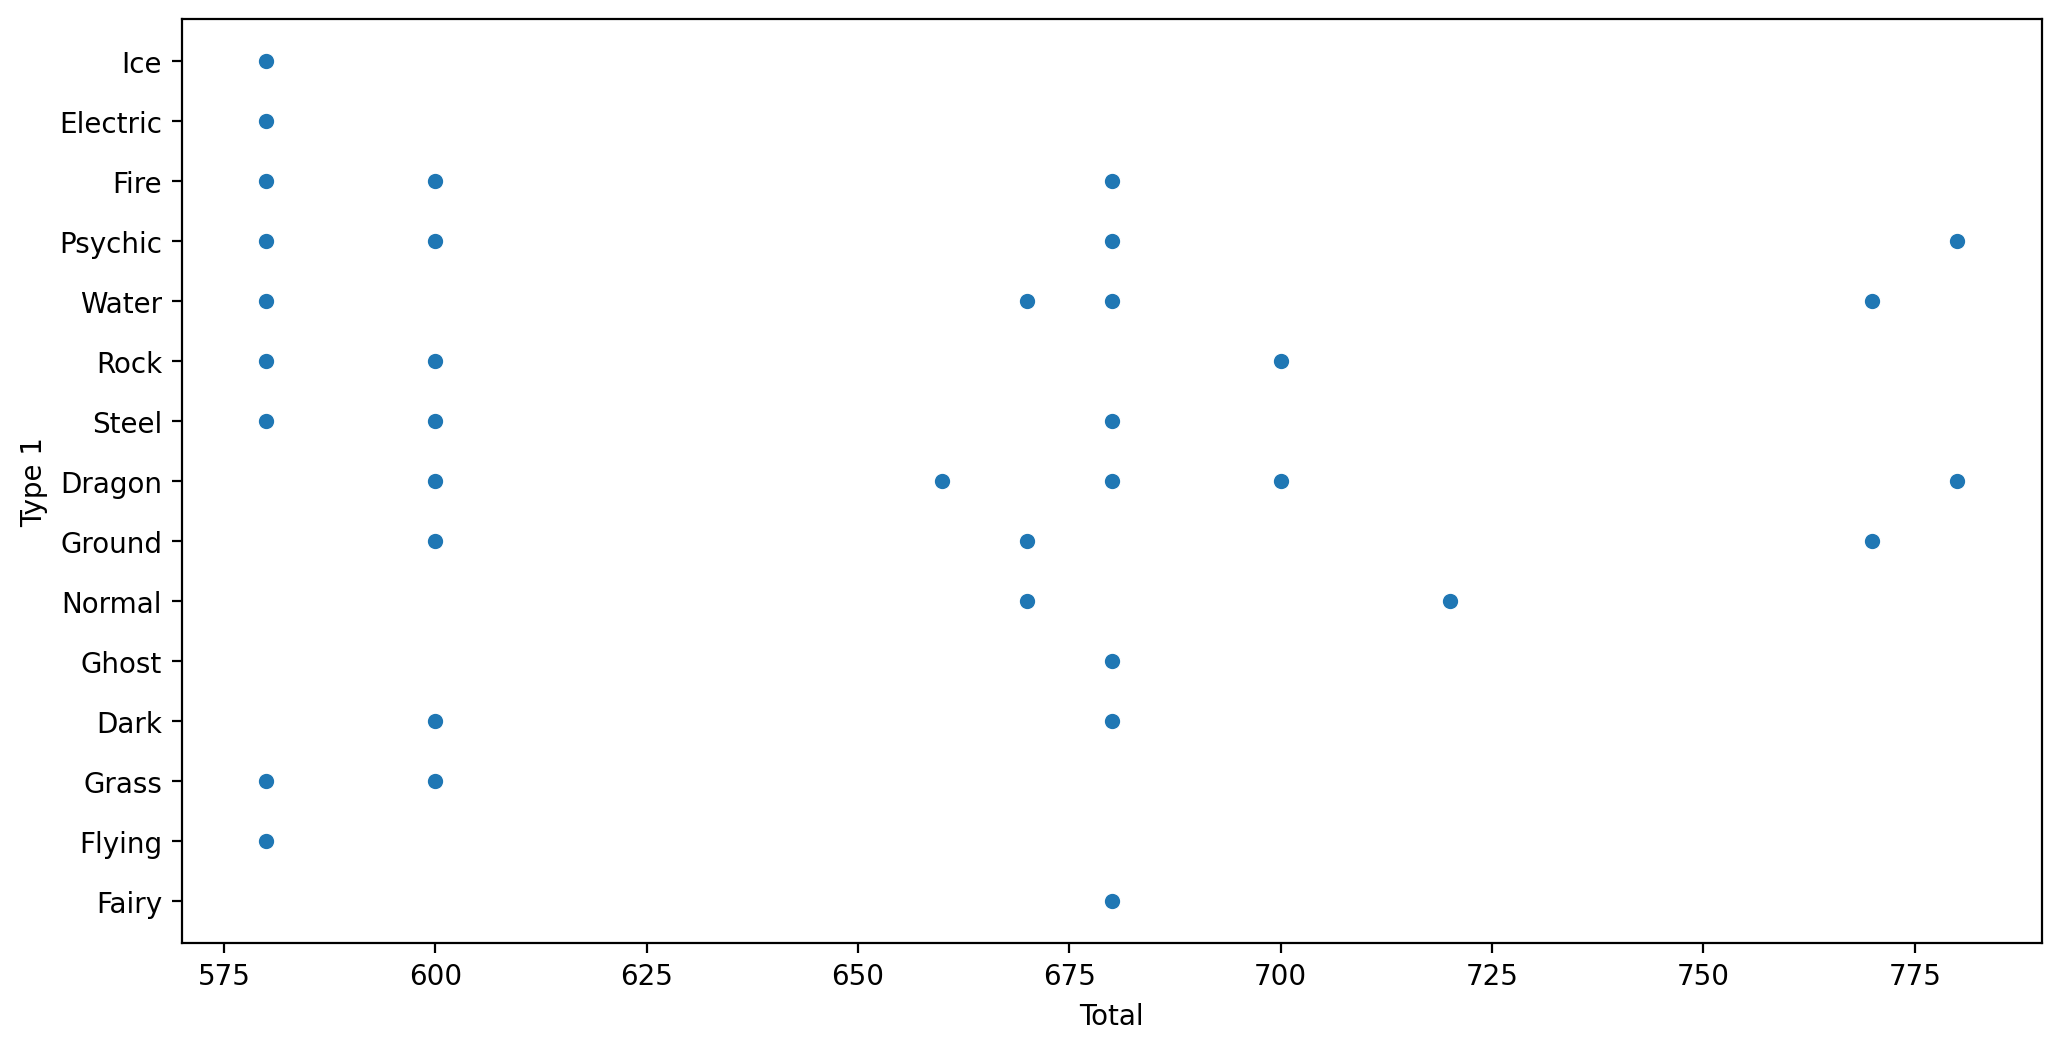

In [41]:
#전설 포켓몬들의 Total값과 Type 1의 관계
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [42]:
#전설포켓몬이 가지는 Total값의 집합 확인
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


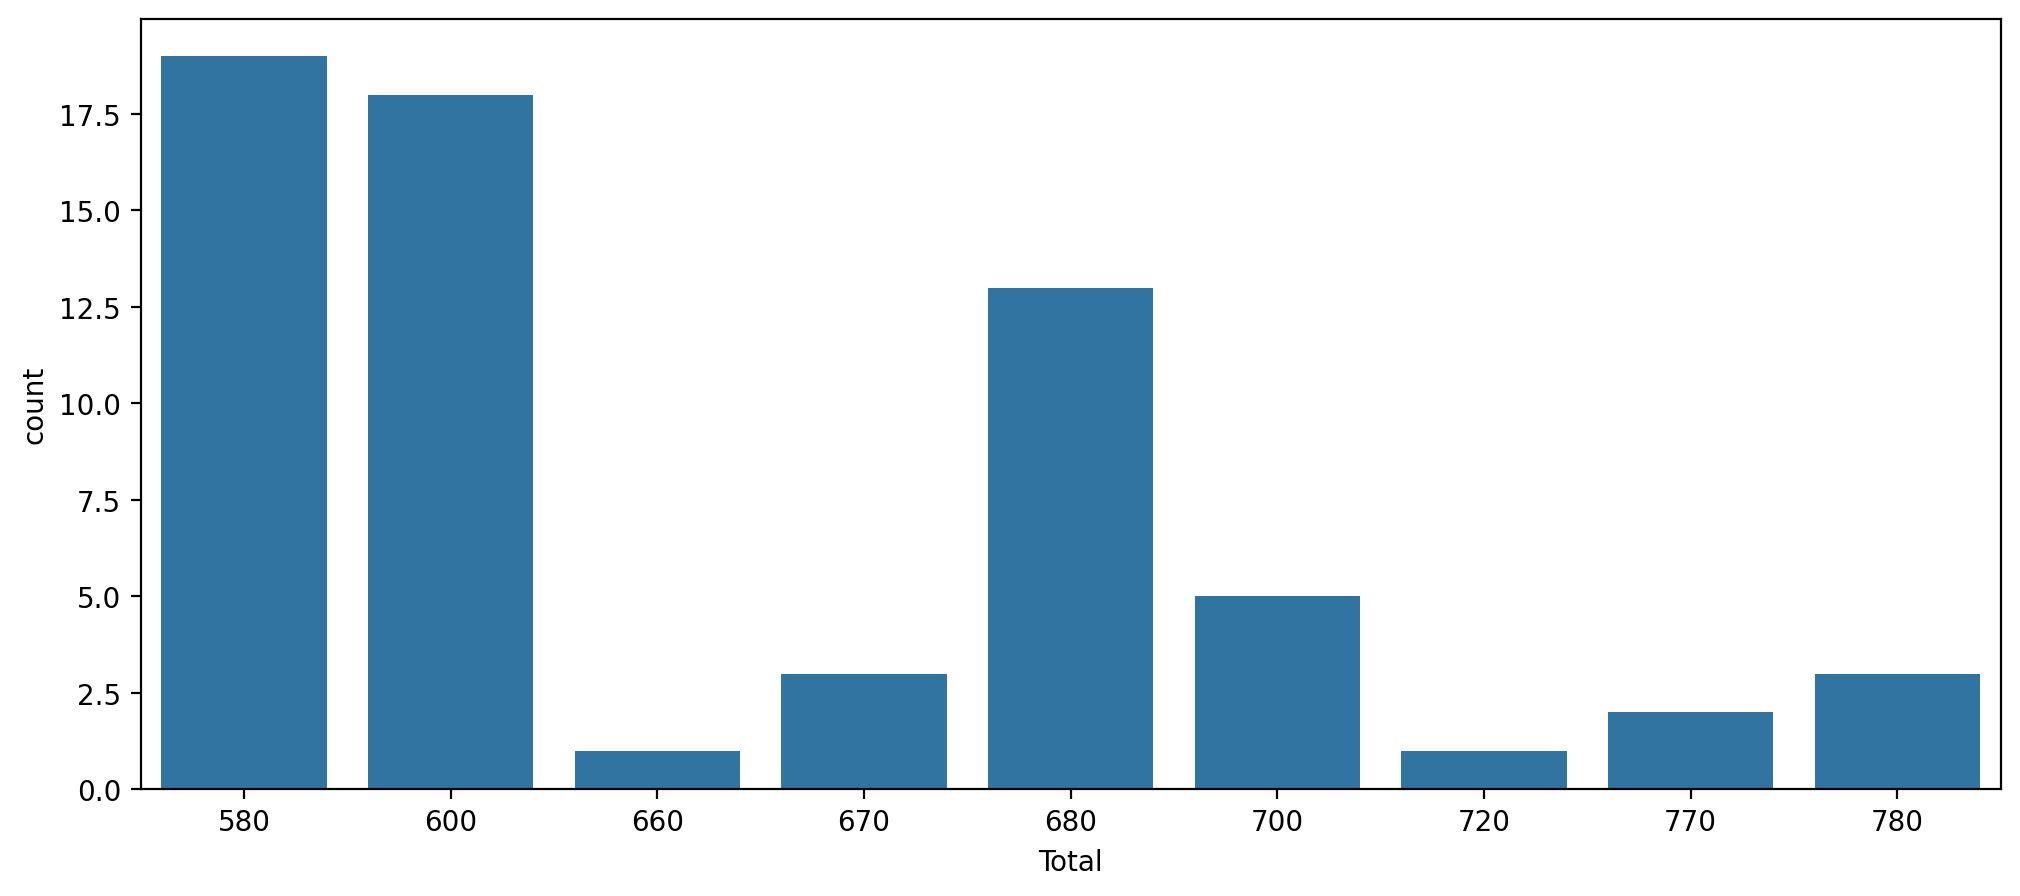

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

sns.countplot(data=legendary, x="Total")
plt.show()

In [44]:
#각 토탈마다 존재하는 전설 포켓몬 수

In [45]:
round(65 / 9, 2)

7.22

In [46]:
#일반 포켓몬이 가지는 Total값의 집합
len(sorted(list(set(ordinary["Total"]))))

195

In [47]:
#일반 포켓몬은 195개의 Total값

In [48]:
#포켓몬 이름하고 전설하고 관련이 있을까?

In [49]:
#이름 특이한거 찾아서 변수에 넣고 이를 합쳐서 보여줌
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [50]:
#이름이 비슷한놈들이 많구만

In [51]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [52]:
#전설데이터에 전설 이름수 해서 데이터 넣어줌
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [53]:
#일반데이터에도 이름수 해서 데이터 넣어줌
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


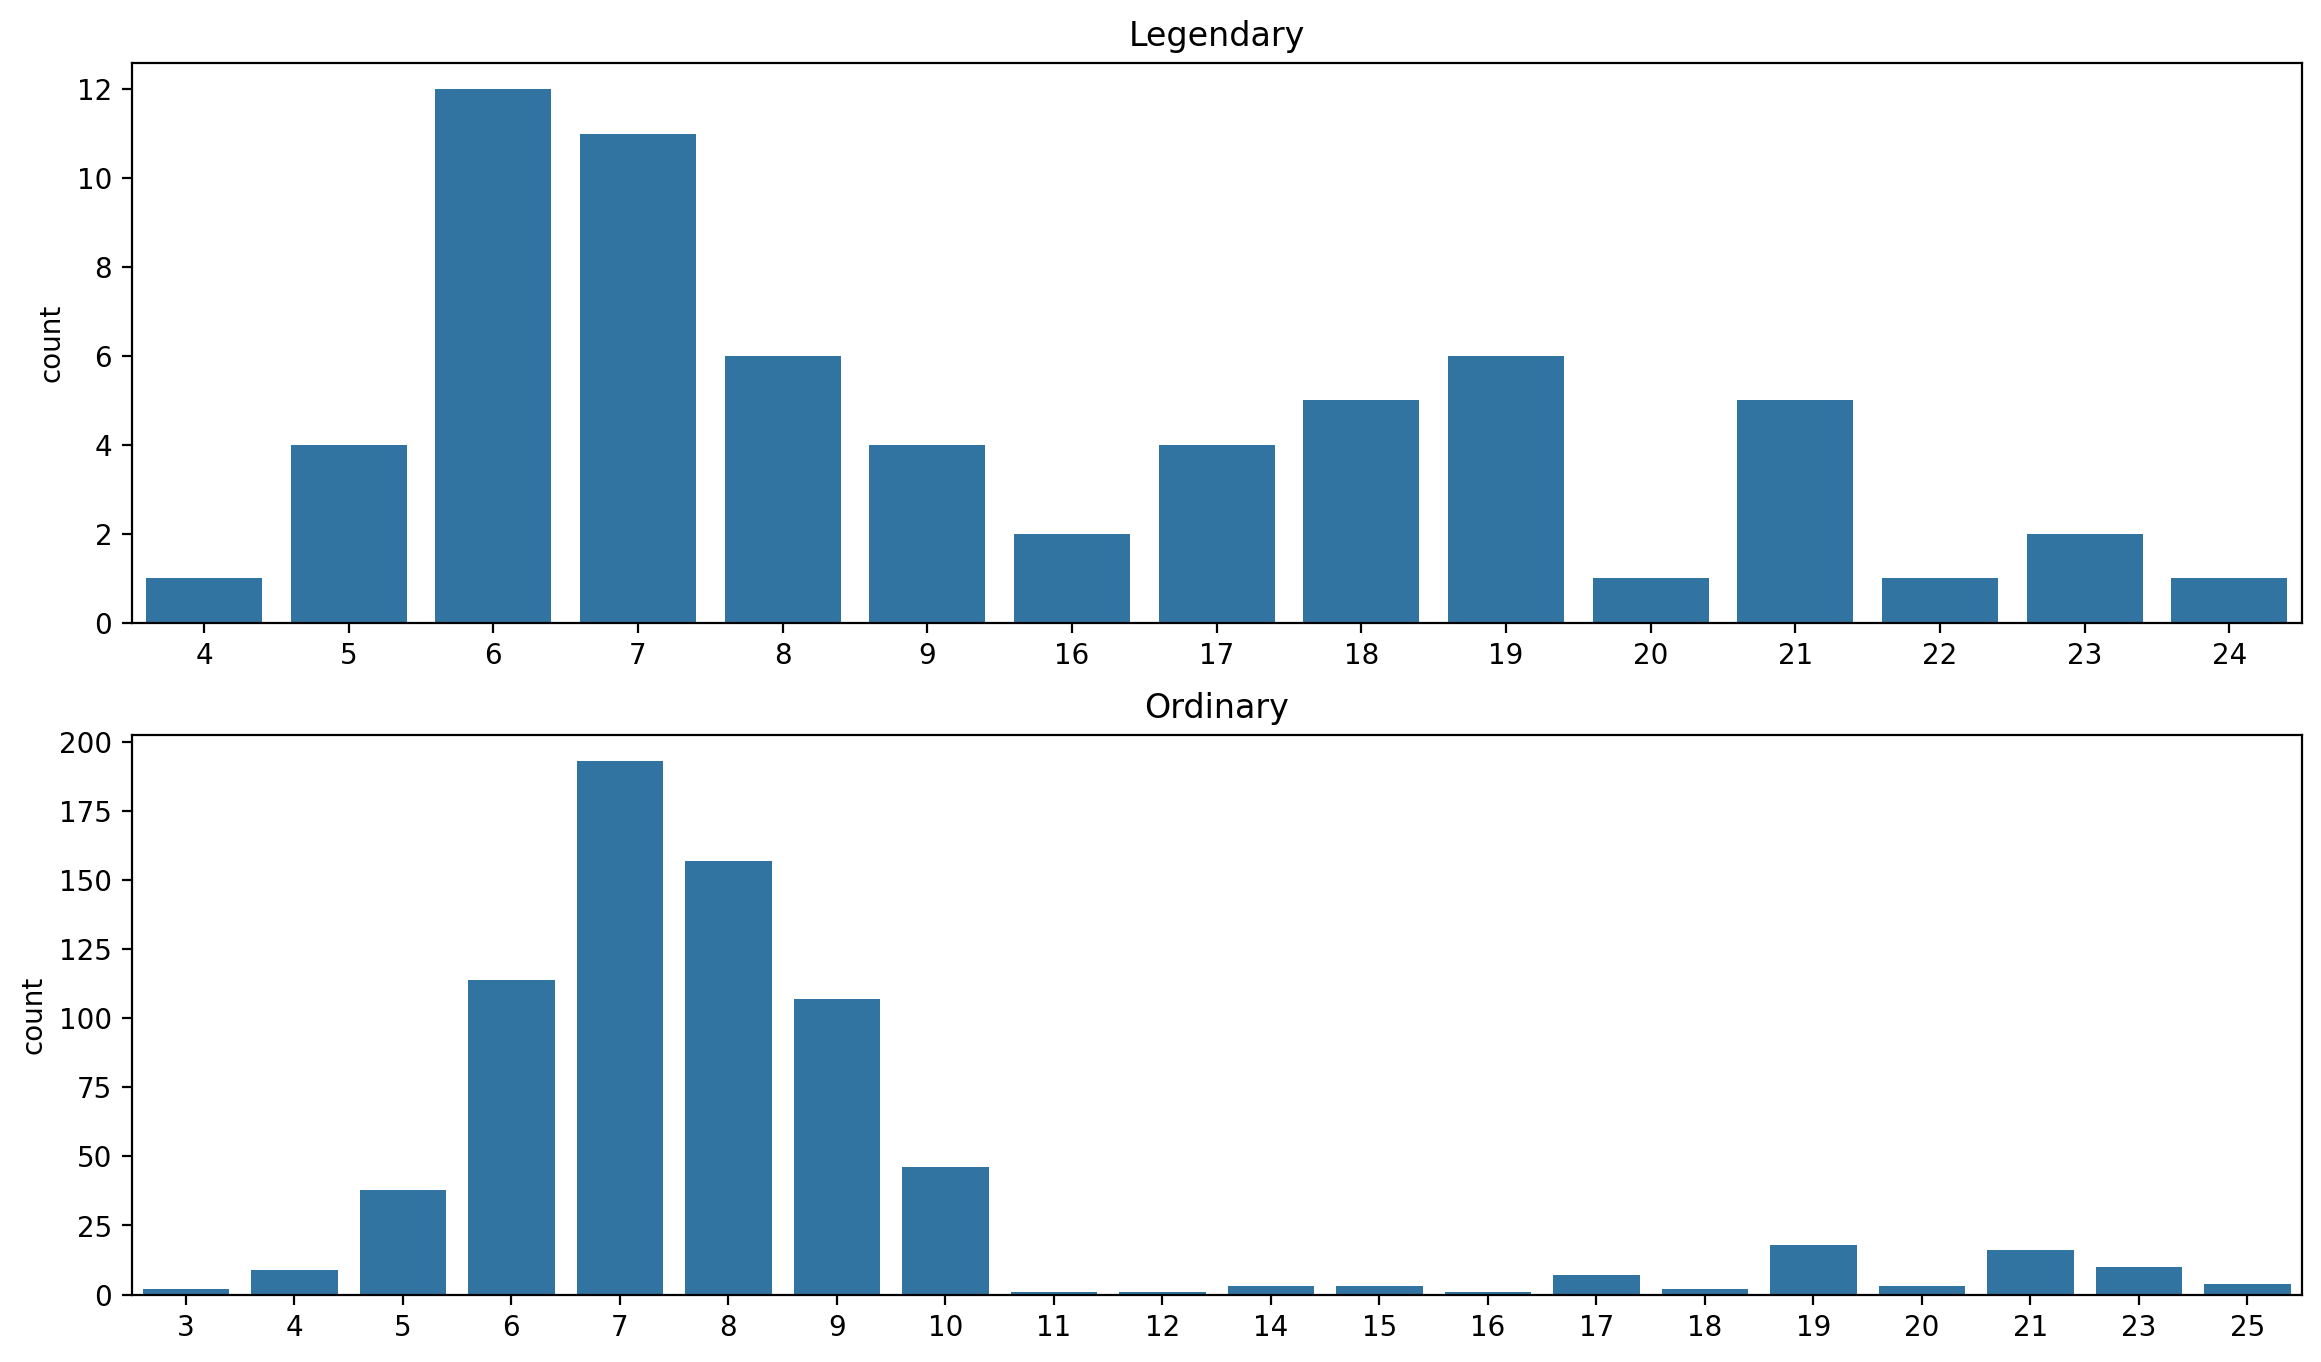

In [54]:
#이름수 넣은 name_count도 특징이 있을까?
plt.figure(figsize=(14, 8))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [55]:
#일반 포켓몬은 10이하에 몰려있고, 전설포켓몬은 10 이상인게 많이 보이는구만

In [56]:
#전설 포켓몬과 일반 포켓몬의 이름이 10글자 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


In [57]:
#전처리 시자아아아아아아악 하겠습니다아아아아아아아 ㅠㅠㅠㅠㅠㅠ

In [58]:
#이름의 길이가 중요한 요소 중 하나였으니 전체 데이터가 있는 pokemon 데이터프레임에 이름수 데이터 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [59]:
#이름의 길이가 10 넘으면 True, 아니면 False
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [60]:
#이름에 알파벳이 아닌 문자가 들어간 경우 전처리 / 스페이스바(공백) 사라지게
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))

In [61]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [62]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [63]:
#isalpha를 통해 이름이 알파벳으로만 이루어졌는지 확인하고 아닌것들은 뭐가 있는지 확인

In [64]:
#으음... 남녀구분하고, 대충 점이나 바대신 띄어쓰기나 공백, 으로 적당히 데이터 전처리 퉁치기
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [65]:
#이름을 적당히 퉁쳤으니 다시 띄어쓰기를 공백으로 그리고 isapha로 알파벳 말고 다른거 있는지 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [66]:
#없네?

In [67]:
#정규표현식을 위해
import re

In [68]:
# 이름을 가져오고
# name = "CharizardMega Charizard X"
# 이름을 공백을 기준으로 나누고
# name_split = name.split(" ")
# name_split
# 나눈것중에 첫번째요소 쪼개려고 가져오고
# temp = name_split[0] 
# 첫번째 쪼갠거 대문자 구분해서 쪼개고
# tokens = re.findall('[A-Z][a-z]*', temp)
# 쪼갠거 다 합쳐서 token에 몰아넣기
# tokens = []
# for part_name in name_split:
#     a = re.findall('[A-Z][a-z]*', part_name)
#     tokens.extend(a)

In [69]:
#위에를 한꺼번에 적용시켜서 함수화 시키기
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [70]:
# 함수화 확인
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [71]:
# 함수 선언 확인 했으니 전설의 포켓몬 데이터 셋에 사용된 토큰 확인
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [72]:
from collections import Counter

my_list = ['a', 'd', 'c', 'a', 'b']
my_counter = Counter(my_list)
my_counter

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [73]:
#전설 포켓몬 이름의 토큰 중 횟수
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [74]:
# Counter가 가장 많이 쓰인 토큰의 횟수를 튜플리스트로 반환

In [75]:
# 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지 여부 
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [76]:
#이름에 있는지 없는지에 따라 True, False

In [77]:
#이제 타입을 원핫 인코딩 합시다 -> 레이블인코딩(정수인코딩) 하지 않는 이유는 불(0) 얼음(1) 바위(2) 등으로 하게 되면 숫자의 대소에 따라 타입별 관계치를 가질 수 있어서

In [78]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Rock,Psychic,Dark,Bug,Ground,Steel,Grass,Flying,Water,Fire,Fairy,Ice,Dragon,Ghost,Fighting,Normal,Electric
0,Grass,Poison,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [79]:
# 성능 하한선의 기준을 제공해주는 베이스라인(baseline) 모델 생성

In [80]:
#오리지널 데이터
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [81]:
#오리지널 데이터 2
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [82]:
# 위 컬럼 중에서 의미없는 문자열 데이터 삭제 ( #, 이름, Type 1, Type 2, Target(legendary))
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [83]:
#타겟 선언
target = 'Legendary'

In [84]:
# 오리지널 데이터에서 features 컬럼에 해당하는 데이터를 변수 X에 저장
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [85]:
# 오리지널 데이터에서 target(legendary) 컬럼에 해당하는 데이터를 변수 y에 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [86]:
#훈련 데이터와 학습데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [87]:
# X_train 포켓몬에 대한 성능치 관련 정보, y_train은 전설 여부

In [88]:
#의사결정트리 모델 학습

In [89]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=25)

In [90]:
# 오리지널 데이터로 학습
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
# X_train의 결과가 y_train인 학습, X_test로 y_pred 값 예측

In [92]:
# 예측값 y_pred가 실제 y_test와 같은지 채점
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]], dtype=int64)

In [93]:
#TN, FP, FN, TP 순서  ('P'ositive는 legendary == True(전설이네), 'N'egative는 legendary == False(일반이네))

In [94]:
#TN - 진짜 아니네 / 일반을 일반으로 판단
#FP - 틀린 전설이네 / 일반을 전설로 판단
#FN - 틀린 일반이네 / 전설을 일반으로 판단
#TP - 진짜 전설이네 / 전설을 전설로 판단

In [95]:
# 다른 척도로 모델의 성능 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [96]:
# recall값이 0.62 / 재현율 실제 맞는 값인제 예측한 값도 맞아야함 / 낮다는건 전설인데 일반이라고 판단함

In [97]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Poison', 'Rock', 'Psychic', 'Dark', 'Bug', 'Ground', 'Steel', 'Grass',
       'Flying', 'Water', 'Fire', 'Fairy', 'Ice', 'Dragon', 'Ghost',
       'Fighting', 'Normal', 'Electric'],
      dtype='object')


In [98]:
#오리지널 데이터를 pokemon에 카피해서 여러가지 피처를 넣었음 (전처리)

In [99]:
#제외해야할 컬럼 뺴고 features 변수에 저장
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [100]:
# # id type1 type2 문자열 데이터라 모델학습에 쓸수 없고, nospace isalpha 전처리때 썻던거라 필요없고, Legendary는 타겟데이터니까 y에 들어가야해서 X에 쓰면 안되고

In [101]:
target #타겟 다시 확인

'Legendary'

In [102]:
# 사용할 데이터 X1에 저장
# 전처리한 데이터 표시
# 후에 오리지널 데이터 성능 비교를 위함
X1 = pokemon[features]
print(X1.shape)
X1.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [103]:
# 사용할 target도 y1에 저장
y1 = pokemon[target]
print(y1.shape)
y1.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [104]:
# 훈련데이터 학습데이터 분리
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=15)

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [105]:
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
y1_pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,

In [106]:
confusion_matrix(y1_test, y1_pred)

array([[141,   6],
       [  1,  12]], dtype=int64)

In [107]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [108]:
#지금 X와 y는 전처리 한 데이터니까

In [109]:
#랜덤포레스트로 해봅시다
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RanC = RandomForestClassifier()
model_RanC.fit(X1_train, y1_train)
pred_RanC = model_RanC.predict(X1_test)
accuracy_score(y1_test, pred_RanC)

0.9625

In [110]:
print(classification_report(y_test, pred_RanC))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



In [111]:
#리콜값이 개판이네

In [112]:
model_RanC1 = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=15)
model_RanC1.fit(X1_train, y1_train)
pred_RanC1 = model_RanC1.predict(X1_test)
accuracy_score(y1_test, pred_RanC1)

0.95625

In [113]:
print(classification_report(y_test, pred_RanC1))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



In [114]:
#리콜값이 오른다?! # n_estimators랑 max_depth 값을 올려서(n300-> 500, max_depth 3->7
#차이점을 확인해보니 정확도는 미미하게 바뀔수는 있어도 recall값이 급격히 늘어남

In [115]:
#xgboost(분류)
from xgboost import XGBClassifier
model_xgbc = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.02,
                      n_estimators = 300,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1)

model_xgbc.fit(X1_train, y1_train)
pred_xgbc = model_xgbc.predict(X1_test)
accuracy_score(y1_test, pred_xgbc)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

0.98125

In [116]:
#오.....?

In [117]:
print(classification_report(y1_test, pred_xgbc))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       147
        True       0.81      1.00      0.90        13

    accuracy                           0.98       160
   macro avg       0.91      0.99      0.94       160
weighted avg       0.98      0.98      0.98       160



In [118]:
#와 뭐야 recall값 오류난거같은데

In [128]:
# 전처리 회귀 선형
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_L1 = LinearRegression()
model_L1.fit(X1_train, y1_train)
pred_L1 = model_L.predict(X1_test)
mean_squared_error(y1_test, pred_L1)

0.04247558856496821

In [120]:
#?

In [122]:
#아 비교할 오리지널 데이터가 없구나 #X는 이미 전처리한 데이터인데
#다시 돌렸는데 오류가 없다? 오 아멘

In [125]:
#X 원래 베이스라인 X1 데이터 전처리

In [129]:
#베이스라인 회귀(선형)
model_L = LinearRegression()
model_L.fit(X_train, y_train)
pred_L = model_L.predict(X_test)
mean_squared_error(y_test, pred_L)

0.05602314475985983

In [130]:
#아 베이스도 낮은값이구나

In [133]:
# 베이스라인 R2 스코어
from sklearn.metrics import r2_score
r2_score(y_test, pred_L)

0.24950679965860179

In [134]:
# 회귀 선형 R2
r2_score(y_test, pred_L1)

0.4309915922222991

In [135]:
# 베이스라인 xgb 회귀
from xgboost import XGBRegressor
model_xgbr = XGBRegressor()                       
model_xgbr.fit(X_train, y_train)                  
pred_xgbr = model_xgbr.predict(X_test)                 
mean_squared_error(y_test, pred_xgbr)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

0.034008414

In [136]:
# 데이터 전처리 xgb 회귀
from xgboost import XGBRegressor
model_xgbr1 = XGBRegressor()                       
model_xgbr1.fit(X1_train, y1_train)                  
pred_xgbr1 = model_xgbr1.predict(X1_test)                 
mean_squared_error(y1_test, pred_xgbr1)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

0.020598814

In [137]:
r2_score(y_test, pred_xgbr)

0.5444189438031677

In [138]:
r2_score(y_test, pred_xgbr1)

0.7240556571627379

In [140]:
# 분류보다 회귀 데이터가 더 좋은듯....?
# 이라고 하기엔 뭐가 더 좋다고 할만한 수치 비교를....?

In [141]:
# 그리드 해봅시다 후욱후욱

In [142]:
#파라미터 설정
params={'learning_rate':[0.07, 0.05, 0.02], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200, 350, 500],
        'subsample':[0.1, 0.75, 0.5, 0.25]
        }

In [143]:
#그리드서치 불러오기
from sklearn.model_selection import GridSearchCV

In [145]:
grid = GridSearchCV(model_xgbr1, params, cv=3, n_jobs=-1)
grid.fit(X1_train, y1_train)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05, 0.02],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 350, 500],
                         'subsample': [0.1, 0.75, 0.5, 0.25]})

In [147]:
grid.best_params_

{'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.75}

In [149]:
model_xgbr2 = XGBRegressor(learning_rate=0.07, max_depth=3, n_estimators=100, subsample=0.75)                       
model_xgbr2.fit(X1_train, y1_train)                  
pred_xgbr2 = model_xgbr2.predict(X1_test)                 
mean_squared_error(y1_test, pred_xgbr2)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

0.016540984

In [150]:
r2_score(y_test, pred_xgbr2)

0.7784148876118447

In [152]:
#데이터 전처리에서 더 할 수 있는게 있지 않을까